In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%run _0_All_functions.ipynb as func

In [2]:
data_path='/Users/sananaz/Desktop/Study2/AIML/GL_python/10_Capstone/input_data.xlsx'
desc_col='Short description'

In [3]:
df=pd.read_excel(data_path)

In [4]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [5]:
df.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [6]:
df['Group_no']=df["Assignment group"].apply(lambda x: x.split('_')[1]).astype('int')

### Text Cleaning

In [7]:
#Data cleaning 
from nltk.corpus import stopwords
import re
#lower case, only alphabets, remove spaces, remove stopwords
df['text_clean'] = df[desc_col].apply(lambda x: str(x).lower())
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub('[^a-zA-z0-9_\s]','',str(x)))
stopwords = set(stopwords.words('english'))
df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
df['text_clean'] = df['text_clean'].apply(lambda x: str(x).strip())

                                                                    

In [8]:
df.head()

,Short description,Description,Caller,Assignment group,Group_no,text_clean
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,0,login issue
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,0,outlook
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,0,cant log vpn
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,0,unable access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,0,skype error


In [9]:
df['Length']=df['text_clean'].apply(lambda x: len(x))

In [10]:
df.sort_values(by='Length') #other languages are present in data

,Short description,Description,Caller,Assignment group,Group_no,text_clean,Length
7316,æ‹¼å†™å’Œè¯­æ³•é”™è¯¯,"ç¼–è¾‘pptæ—¶ï¼Œæ€»æ˜¯å¼¹å‡º""æ— æ³•æ£€æŸ¥æ‹¼å†™...",jtplaoui uvsihfpn,GRP_48,48,,0
7126,ç”µè„‘å¡ä¸”è¿žä¸ä¸Šå†…ç½‘,\n\nreceived from: tuqrvowp.fxmzkvqo@gmail.com...,tuqrvowp fxmzkvqo,GRP_30,30,,0
1954,ç¬”è®°æœ¬é‡æ–°è£…ä¸‹ç³»ç»Ÿ,æŠŠæˆ‘çš„ç¬”è®°æœ¬é‡æ–°è£…ä¸‹ç³»ç»Ÿ,xjvubmlq vyamhjip,GRP_30,30,,0
3738,ç”µè¯æ•…éšœ,é“¸æ£’è½¦é—´ç”µè¯æ•…éšœï¼Œ39523850,sbkhjigv pbvlfcse,GRP_48,48,,0
2975,???????????????????,\r\n\r\nreceived from: yzbjhmpw.vzrulkog@gmail...,yzbjhmpw vzrulkog,GRP_0,0,,0
2004,ç”µè„‘ç™»å½•å¯†ç å¿˜è®°ï¼Œé‡ç½®å¯†ç ã€‚,ç”µè„‘ç™»å½•å¯†ç å¿˜è®°ï¼Œé‡ç½®å¯†ç ã€‚,weqocbnu eoixcpvy,GRP_31,31,,0
8471,ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,to å°è´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,xqyjztnm onfusvlz,GRP_30,30,,0
6534,æ¶‚å±‚ã€ç®¡ä¸è½¦é—´ç”µè¯æ•…éšœ,æ¶‚å±‚ã€ç®¡ä¸è½¦é—´ç”µè¯æ•…éšœï¼Œ40634943ã€...,vrmpysoz qkiucpdx,GRP_48,48,,0
3137,é‚®ç®±æ— æ³•å¯åŠ¨,é‚®ç®±æ— æ³•å¯åŠ¨ï¼Œæç¤ºæ— æ³•åˆ›æ–°æ–°çš„å...,bzypjigs qokwvgyn,GRP_30,30,,0
3120,ç”µè„‘ç¡¬ç›˜æ•…éšœï¼Œè¯·æ±‚ç»´ä¿®ã€‚,ç”µè„‘ç¡¬ç›˜æ•…éšœï¼Œè¯·æ±‚ç»´ä¿®ã€‚,ruhbyzpv vlksnjti,GRP_30,30,,0


In [11]:
df[df["Length"]==0]["Length"].value_counts()

0    47
Name: Length, dtype: int64

In [12]:
#Remove other languages alphabets
df=df[df["Length"]!=0]

In [13]:
df.shape

(8453, 7)

### Text Visualization

(8453, 7)


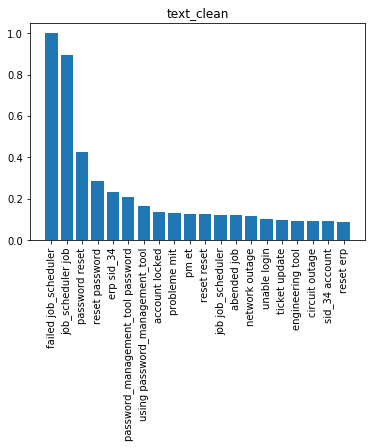

(8453, 7)


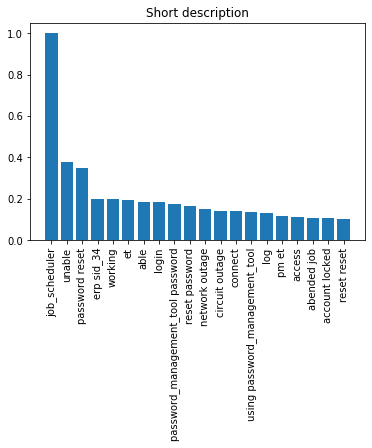

In [ ]:
Visualize_Word_Cloud(df, text_col="text_clean", plot_freq=1,plot_wordCloud=0)
Visualize_Word_Cloud(df, text_col="Short description",plot_freq=1,plot_wordCloud=0)

(8453, 7)


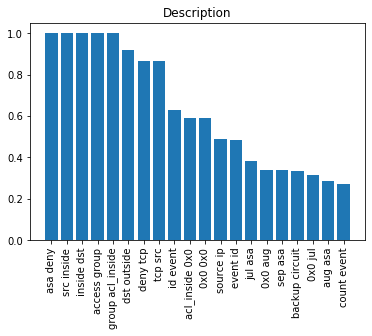

In [ ]:
Visualize_Word_Cloud(df, text_col="Description",plot_freq=1,plot_wordCloud=0)

(8453, 7)


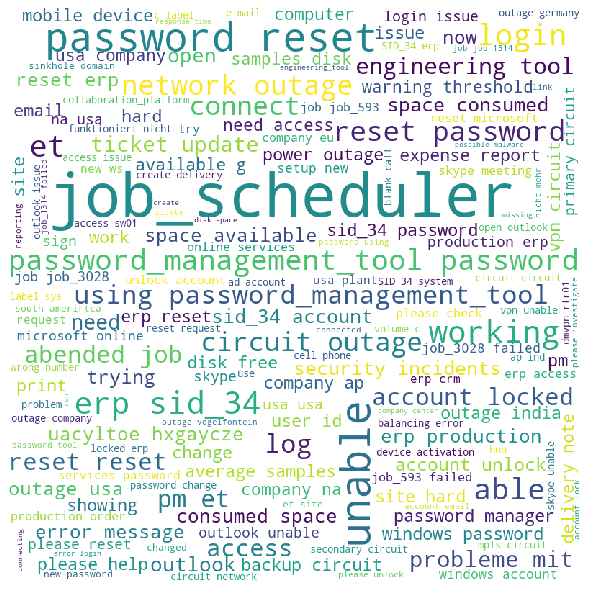

(8453, 7)


In [ ]:
Visualize_Word_Cloud(df, text_col="Short description", plot_freq=0,plot_wordCloud=1)
Visualize_Word_Cloud(df, text_col="Description", plot_freq=0,plot_wordCloud=1)

In [ ]:
#words like et are not coming in text_clean - which is good
#unable and login are coming as separate words in original text - but coming together in cleaned text
#Description has very different top words freq as compared to short description - these can be standard terms which do not add any values like stopwords

In [ ]:
#Other Language Words are present

### Target Analysis

In [ ]:
df["Assignment group"].value_counts().sort_values(ascending=False)

In [ ]:
Assignment_group=pd.DataFrame(df["Assignment group"].value_counts()).reset_index().sort_values(by='Assignment group',ascending=False)
Assignment_group.columns=['Assignment group','Count']
Assignment_group['Percent']=Assignment_group.Count/Assignment_group.shape[0]
Assignment_group

In [ ]:
plt.plot(Assignment_group["Percent"])

In [ ]:
plt.plot(Assignment_group[Assignment_group["Percent"]>1]['Percent'])

In [ ]:
Assignment_group[Assignment_group["Percent"]>1].shape

In [ ]:
#20 groups with rows>1% or ~80 count - these can be collapsed into a single other group?

In [ ]:
Visualize_Word_Cloud(df, text_col="text_clean",plot_freq=1,plot_wordCloud=0)
Visualize_Word_Cloud(df, text_col="text_clean", filter_column="Assignment group", filter_value="GRP_0",plot_freq=1,plot_wordCloud=0)
Visualize_Word_Cloud(df, text_col="text_clean", filter_column="Assignment group", filter_value="GRP_8",plot_freq=1,plot_wordCloud=0)
Visualize_Word_Cloud(df, text_col="text_clean", filter_column="Assignment group", filter_value="GRP_24",plot_freq=1,plot_wordCloud=0)
Visualize_Word_Cloud(df, text_col="text_clean", filter_column="Assignment group", filter_value="GRP_12",plot_freq=1,plot_wordCloud=0)


In [ ]:
#Group 0 - has password_reset, account_locked, unable login etc as high freq words
#Group 8 - is related to job_secheduler, network outrage, circuit related terms
#Group 24 - is in another language - 
#Group 12 - is related to space and disk related issues